## 데이터 합치기

In [1]:
import pandas as pd

In [55]:
size = pd.read_csv('./data/도시지역면적.csv',encoding='EUC-KR')

In [56]:
bus = pd.read_excel('./data/버정_최종.xlsx',encoding='EUC-KR')

In [57]:
pop = pd.read_csv('./data/population_Final.csv',encoding='EUC-KR')

In [77]:
bus

,행정구역별,전체버스정류장
0,서울,6240
1,부산,6993
2,대구,3111
3,인천,5346
4,광주,2248
5,대전,2518
6,울산,3083


In [59]:
size

,행정구역별,2018
0,서울특별시,605.57
1,부산광역시,940.83
2,대구광역시,797.92
3,인천광역시,579.74
4,광주광역시,480.05
5,대전광역시,495.82
6,울산광역시,755.55


In [60]:
bus = bus.rename(columns={'구분':'행정구역별'})
bus = bus.drop(7, axis=0)

In [61]:
size['행정구역별'] = bus['행정구역별']

In [74]:
size

,행정구역별,2018
0,서울,605.57
1,부산,940.83
2,대구,797.92
3,인천,579.74
4,광주,480.05
5,대전,495.82
6,울산,755.55


In [72]:
#pop = pop.drop(0, axis=0)
pop = pop.reset_index()
pop = pop.drop('index', axis=1)

In [73]:
pop

,행정구역,인구수
0,서울,9577030
1,부산,3385964
2,대구,2927925
3,인천,2428301
4,광주,1469981
5,대전,1450439
6,울산,1144299


In [75]:
size['인구수'] = pop['인구수']

In [78]:
size['정류장'] = bus['전체버스정류장']

In [79]:
size

,행정구역별,2018,인구수,정류장
0,서울,605.57,9577030,6240
1,부산,940.83,3385964,6993
2,대구,797.92,2927925,3111
3,인천,579.74,2428301,5346
4,광주,480.05,1469981,2248
5,대전,495.82,1450439,2518
6,울산,755.55,1144299,3083


In [82]:
size['면적대비정류장'] = size['정류장'] / size['2018']

In [83]:
size

,행정구역별,2018,인구수,정류장,면적대비정류장
0,서울,605.57,9577030,6240,10.304341
1,부산,940.83,3385964,6993,7.432799
2,대구,797.92,2927925,3111,3.898887
3,인천,579.74,2428301,5346,9.221375
4,광주,480.05,1469981,2248,4.682846
5,대전,495.82,1450439,2518,5.078456
6,울산,755.55,1144299,3083,4.080471


## 면적에 비례한 정류장 수 시각화

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

In [90]:
rc('font', family=font_name)
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,8)

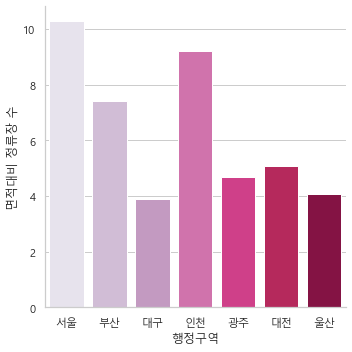

In [91]:
sns.catplot(x='행정구역별',y='면적대비정류장',data=size,kind='bar',palette='PuRd')
plt.ylabel('면적대비 정류장 수')
plt.xlabel('행정구역')
plt.show()